In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
plt.style.use("ggplot")

colors = {
    ".": "bisque",
    "@": "black",
    "T": "black",
    "S": "cyan",
    "G": "green",
    "P": "red",
    "0": "red",
    "1": "blue",
    "2": "purple",
    "3": "orange"
}

domain_path = "assets/den101d.map"
problem_path = "data/den101d.map_n=1_e=1_s=3.in"
solution_path = "log.out"

In [2]:
with open(domain_path, mode="r") as f:
    lines = f.readlines()
    
height = int(lines[1][:-1].split(" ")[-1])
width = int(lines[2][:-1].split(" ")[-1])
grid = np.array([[lin for lin in line[:-1]] for line in lines[4:]])

In [3]:
with open(problem_path, mode="r") as f:
    lines = f.readlines()
    
sublines = lines[int(lines[0].split(" ")[1][:-1])+2:]
maps = [list(map(int, lin[:-1].split(" "))) for lin in sublines[int(sublines[0][:-1])+1:]]
map_node_id = {m[0]:m[1] for m in maps}
node_id_map = {m[1]:m[0] for m in maps}

In [4]:
with open(solution_path, mode="r") as f:
    lines = f.readlines()

In [5]:
partitions = []

i = 0
while True:
    lin = lines[i]
    if lin[:9] == "Partition":
        break
    i += 1

i += 1
elements = list(map(int, lines[i:][0][:-2].split(" ")))
partitions.append(elements)
i += 1

paths = []
while True:
    path = []
    if len(lines) <= i:
        break
    while True:
        if len(lines) <= i:
            break
        lin = lines[i]
        if lin[:9] == "Partition":
            i += 1
            elements = list(map(int, lines[i][:-2].split(" ")))
            partitions.append(elements)
            i += 1
            break
        path.append(int(lin.split(" ")[0]))
        i += 1
    paths.append(path)

In [6]:
source = node_id_map[paths[0][0]]
goal = node_id_map[paths[0][-1]]

In [7]:
grid_height = len(grid)
grid_width = len(grid[0])

grid[source // grid_width, source % grid_width] = "S"
grid[goal // grid_width, goal % grid_width] = "G"

for t, path in enumerate(paths):
    for p in path[1:-1]:
        n = node_id_map[p]
        if grid[n // grid_width, n % grid_width] not in ["S", "G"]:
            grid[n // grid_width, n % grid_width] = str(t)
        
tlis = []
for t, elements in enumerate(partitions):
    for e in elements:
        n = node_id_map[e]
        grid[n // grid_width, n % grid_width] = str(t)
        tlis.append((n // grid_width, n % grid_width))

grid_img = np.zeros((grid_height, grid_width, 4), dtype=float)
for i, row in enumerate(grid):
    for j, cell in enumerate(row):
        alpha = 0.25
        if (i, j) in tlis:
            alpha = 1.0
        elif colors[cell] == "bisque":
            alpha = 0.0
        elif colors[cell] in ["black"]:
            alpha = 0.8
        elif colors[cell] in ["cyan", "green"]:
            alpha = 1.0
        grid_img[i, j] += np.array(list(plt.cm.colors.to_rgb(colors[cell])) + [alpha])

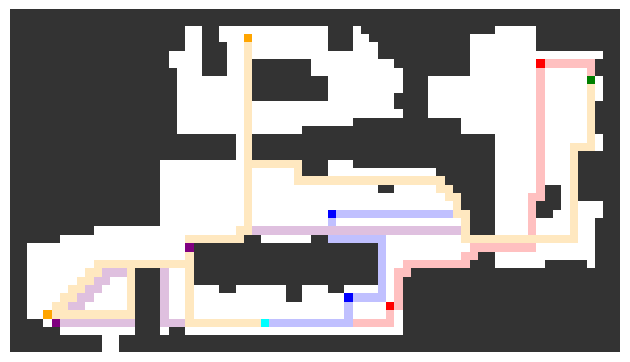

In [8]:
plt.grid(False)
plt.axis('off')
plt.imshow(grid_img)#[60:125, 35:220])
plt.tight_layout()
plt.savefig("den101_seed3_el10.pdf", bbox_inches='tight')

In [124]:
partitions

[[1236, 134], [757, 1189], [970, 26], [1281, 1240]]

In [125]:
grid

array([['@', '@', '@', ..., 'T', 'T', 'T'],
       ['@', '@', '@', ..., 'T', 'T', 'T'],
       ['@', '@', '@', ..., 'T', 'T', 'T'],
       ...,
       ['T', 'T', 'T', ..., '@', '@', '@'],
       ['T', 'T', 'T', ..., '@', '@', '@'],
       ['T', 'T', 'T', ..., '@', '@', '@']], dtype='<U1')